In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import graphviz 

In [4]:
data= pd.read_csv('twitchdata-update.csv', header='infer')

In [5]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


In [6]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

In [7]:
data['Language']= data['Language'].replace(['Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'],'NotEnglish')

In [8]:
data['Partnered'] = data['Partnered'].replace([True], 1)
data['Partnered'] = data['Partnered'].replace([False], 0)

In [9]:
data['Mature'] = data['Mature'].replace([True], 1)
data['Mature'] = data['Mature'].replace([False], 0)

In [10]:
data['Language'] = data['Language'].replace(['English'], 1)
data['Language'] = data['Language'].replace(['NotEnglish'], 0)

In [11]:
data['Followers'].where(data['Followers'] > 1000000, 0, inplace=True)
data['Followers'].where(data['Followers'] <= 1000000, 1, inplace=True)

In [12]:
data['Average viewers'].where(data['Average viewers'] > 10000, 0, inplace=True)
data['Average viewers'].where(data['Average viewers'] <= 10000, 1, inplace=True)

In [13]:
data['Peak viewers'].where(data['Peak viewers'] > 100000, 0, inplace=True)
data['Average viewers'].where(data['Average viewers'] <= 10000, 1, inplace=True)

In [14]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,1,1,1734810,93036735,1,0,1
1,summit1g,6091677300,211845,310998,1,1,1370184,89705964,1,0,1
2,Gaules,5644590915,515280,387315,1,1,1023779,102611607,1,1,0
3,ESL_CSGO,3970318140,517740,300575,0,1,703986,106546942,1,0,1
4,Tfue,3671000070,123660,285644,1,1,2068424,78998587,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,0,0,0,562691,2162107,1,0,0
996,빅헤드 (bighead033),122523705,153000,0,0,0,52289,4399897,1,0,0
997,마스카 (newmasca),122452320,217410,0,0,0,-4942,3417970,1,0,0
998,AndyMilonakis,122311065,104745,0,0,0,109111,3926918,1,0,1


In [15]:
data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,1,1,1734810,93036735,1,0,1
1,summit1g,6091677300,211845,310998,1,1,1370184,89705964,1,0,1
2,Gaules,5644590915,515280,387315,1,1,1023779,102611607,1,1,0
3,ESL_CSGO,3970318140,517740,300575,0,1,703986,106546942,1,0,1
4,Tfue,3671000070,123660,285644,1,1,2068424,78998587,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,0,0,0,562691,2162107,1,0,0
996,빅헤드 (bighead033),122523705,153000,0,0,0,52289,4399897,1,0,0
997,마스카 (newmasca),122452320,217410,0,0,0,-4942,3417970,1,0,0
998,AndyMilonakis,122311065,104745,0,0,0,109111,3926918,1,0,1


In [16]:
from sklearn import tree

In [17]:
Y=data['Average viewers']

In [18]:
Y

0      1
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Average viewers, Length: 1000, dtype: int64

In [19]:
X = data.drop(['Channel','Stream time(minutes)','Followers','Followers gained','Views gained','Followers gained','Watch time(Minutes)','Views gained','Partnered'], axis = 1)

In [20]:
X

,Peak viewers,Average viewers,Mature,Language
0,222720,1,0,1
1,310998,1,0,1
2,387315,1,1,0
3,300575,0,0,1
4,285644,1,0,1
...,...,...,...,...
995,0,0,0,0
996,0,0,0,0
997,0,0,0,0
998,0,0,0,1


In [21]:
type(X)

pandas.core.frame.DataFrame

In [22]:
type(Y)

pandas.core.series.Series

In [23]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)

In [24]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [25]:
clf = clf.fit(X,Y)

In [26]:
import pydotplus

In [27]:
from IPython.display import Image

In [28]:
data_dot=tree.export_graphviz(clf, feature_names=X.columns, class_names=['One M Followers','Less than One M'], filled=True, out_file=None)

In [29]:
graph = pydotplus.graph_from_dot_data(data_dot)

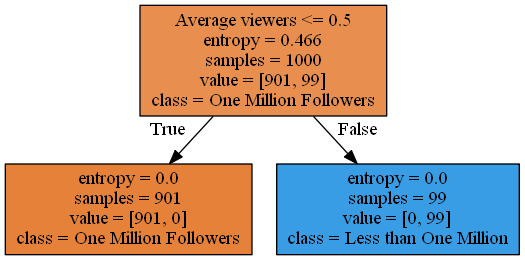

In [30]:
Image(graph.create_png())

In [31]:
test_Data = [['MCN', 0,0,0,1,'One M Followers'], ['GBS',0,1,0,1,'Less than One M'], ['KTN', 0,0,1,0,'Less than One M'], ['jbs',0,0,0,0,'One M Followers']]

In [32]:
test_Data

[['MCN', 0, 0, 0, 1, 'One M Followers'],
 ['GBS', 0, 1, 0, 1, 'Less than One M'],
 ['KTN', 0, 0, 1, 0, 'Less than One M'],
 ['jbs', 0, 0, 0, 0, 'One M Followers']]

In [38]:
test_Data=pd.DataFrame(test_Data, columns=['Name','Peak viewers','Average viewers','Mature','Language','Followers'])

In [39]:
test_Data

,Name,Peak viewers,Average viewers,Mature,Language,Followers
0,MCN,0,0,0,1,One M Followers
1,GBS,0,1,0,1,Less than One M
2,KTN,0,0,1,0,Less than One M
3,jbs,0,0,0,0,One M Followers


In [40]:
testY=test_Data['Followers']

In [41]:
X_test=test_Data.drop(['Name','Followers'], axis=1)

In [42]:
X_test

,Peak viewers,Average viewers,Mature,Language
0,0,0,0,1
1,0,1,0,1
2,0,0,1,0
3,0,0,0,0
